# Interpretability

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from src.evaluate import get_results_df
from src.misc import load_processed_dataset
from tqdm import tqdm

import sys  

sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/')
%load_ext autoreload
%autoreload 2

In [2]:
stocks = ["NVDA", "JPM", "HD", "UNH"]
features = ['log_return', 'log_return_open', 'log_return_high', 'log_return_low', 'log_return_volume',
            'sma', 'wma', 'ema', 'dema', 'tema', 'aroon', 'rsi', 'willr', 'cci', 'ad', 'mom',
            'slowk', 'slowd', 'macd', 'fed_funds_rate', '^N225', '^IXIC', '^FTSE', '^SPX', '^DJI']

## Model Agnostic Methods

Permutation feature importance on deep learning models

Starting with LSTM model

In [289]:
from src.evaluate import permutation_importance

dfs = []
for stock in ["NVDA", "JPM", "UNH", "HD"]:
    df = permutation_importance("LSTM", stock)
    dfs.append(df)
dfs = pd.concat(dfs)
dfs = dfs.groupby(level=0).mean()
display(dfs)

Loading LSTM_NVDA.
Rank 1: trial no. 0, value: 0.5537848472595215. Run completed at 2024-04-29 18:01:30.993116
Loading LSTM_NVDA.
Rank 1: trial no. 0, value: 0.5537848472595215. Run completed at 2024-04-29 18:01:30.993116
Loading LSTM_JPM.
Rank 1: trial no. 3, value: 0.6175298690795898. Run completed at 2024-04-29 18:13:38.976207
Loading LSTM_JPM.
Rank 1: trial no. 3, value: 0.6175298690795898. Run completed at 2024-04-29 18:13:38.976207
Loading LSTM_UNH.
Rank 1: trial no. 11, value: 0.5896414518356323. Run completed at 2024-04-29 20:23:47.878337
Loading LSTM_UNH.
Rank 1: trial no. 11, value: 0.5896414518356323. Run completed at 2024-04-29 20:23:47.878337
Loading LSTM_HD.
Rank 1: trial no. 4, value: 0.6055777072906494. Run completed at 2024-04-29 18:19:41.955427
Loading LSTM_HD.
Rank 1: trial no. 4, value: 0.6055777072906494. Run completed at 2024-04-29 18:19:41.955427


,RMSE,Accuracy,Avg. daily return,Risk adj. return
^DJI,0.00006412,1.70000000,0.00040338,0.02809956
^FTSE,0.00002575,1.10000000,0.00035024,0.02595172
^IXIC,0.00003057,0.40000000,0.00023086,0.02152301
^N225,0.00002271,2.40000000,0.00046137,0.03695707
^SPX,0.00002844,1.30000000,0.00037648,0.02756674
ad,0.00003609,0.60000000,-0.00001082,-0.00212652
aroon,0.00001893,-0.50000000,-0.00017383,-0.01627432
cci,0.00002091,0.60000000,0.00004210,0.00451493
dema,-0.00000213,0.30000000,-0.00001718,-0.00237491
ema,0.00000732,0.30000000,-0.00000340,-0.00399535


We can see RMSE is change minimally by perturbations, so we ignore. We normalise other columns for ease of comparison.

In [290]:
df = dfs.copy()
df = df[["Accuracy", "Avg. daily return", "Risk adj. return"]]
df = (df - df.mean()) / df.std()
df["Mean"] = df.mean(axis=1)
df = df.sort_values("Mean")
df

,Accuracy,Avg. daily return,Risk adj. return,Mean
aroon,-1.48250348,-1.32831239,-1.24822796,-1.35301461
sma,-1.61876299,-0.96482383,-0.94029241,-1.17462641
wma,-1.07372495,-0.86327923,-0.78417868,-0.90706095
log_return_low,-1.20998446,-0.76977775,-0.68411222,-0.88795814
tema,-0.52868690,-0.86592872,-0.93634702,-0.77698755
log_return_volume,-0.66494641,-0.64509908,-0.53340975,-0.61448508
log_return,-0.52868690,-0.48995289,-0.55709080,-0.52524353
macd,0.42512967,-0.65317340,-1.24500266,-0.49101546
log_return_open,-0.52868690,-0.34628410,-0.43879833,-0.43792311
ema,-0.39242739,-0.38482895,-0.45540183,-0.41088606


Text(0.5, 0, 'Permuted feature')

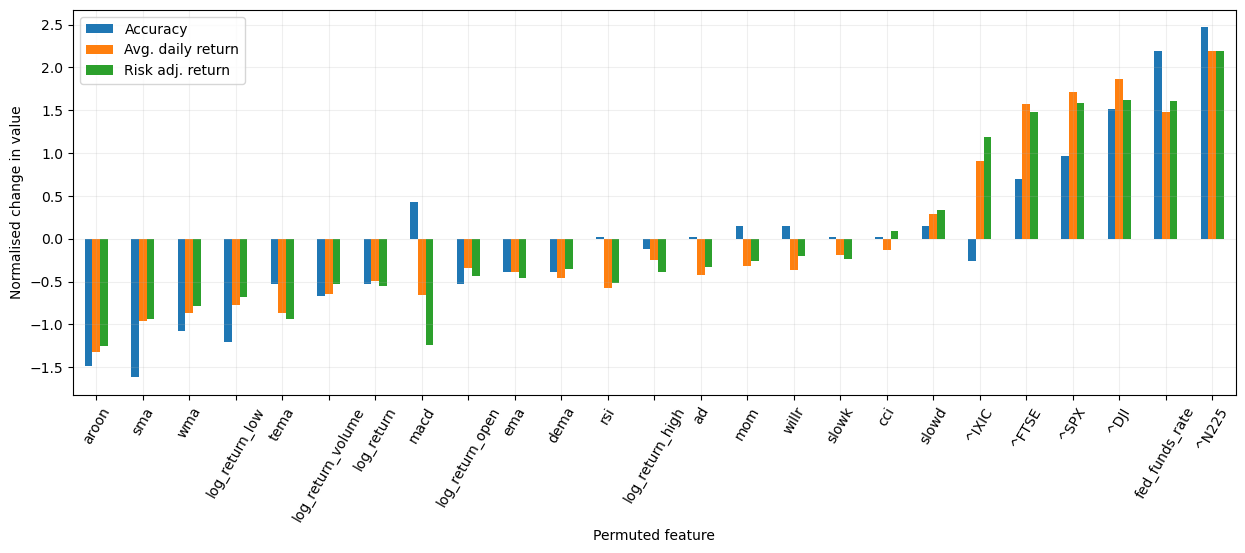

In [291]:
fig, ax = plt.subplots(figsize=(15, 5))
df[["Accuracy", "Avg. daily return", "Risk adj. return"]].plot(kind='bar', ax=ax)
ax.xaxis.set_tick_params(rotation=60)
ax.grid(True, alpha=0.2)
ax.set_ylabel("Normalised change in value")
ax.set_xlabel("Permuted feature")


Now, the rest of the models.

Loading LSTM_NVDA.
Rank 1: trial no. 0, value: 0.5537848472595215. Run completed at 2024-04-29 18:01:30.993116


Loading LSTM_NVDA.
Rank 1: trial no. 0, value: 0.5537848472595215. Run completed at 2024-04-29 18:01:30.993116
Loading LSTM_JPM.
Rank 1: trial no. 3, value: 0.6175298690795898. Run completed at 2024-04-29 18:13:38.976207
Loading LSTM_JPM.
Rank 1: trial no. 3, value: 0.6175298690795898. Run completed at 2024-04-29 18:13:38.976207
Loading LSTM_UNH.
Rank 1: trial no. 11, value: 0.5896414518356323. Run completed at 2024-04-29 20:23:47.878337
Loading LSTM_UNH.
Rank 1: trial no. 11, value: 0.5896414518356323. Run completed at 2024-04-29 20:23:47.878337
Loading LSTM_HD.
Rank 1: trial no. 4, value: 0.6055777072906494. Run completed at 2024-04-29 18:19:41.955427
Loading LSTM_HD.
Rank 1: trial no. 4, value: 0.6055777072906494. Run completed at 2024-04-29 18:19:41.955427
Loading CNN_NVDA.
Rank 1: trial no. 11, value: 0.5737051963806152. Run completed at 2024-04-29 20:22:15.814904
Loading CNN_NVDA.
Rank 1: trial no. 11, value: 0.5737051963806152. Run completed at 2024-04-29 20:22:15.814904
Loading

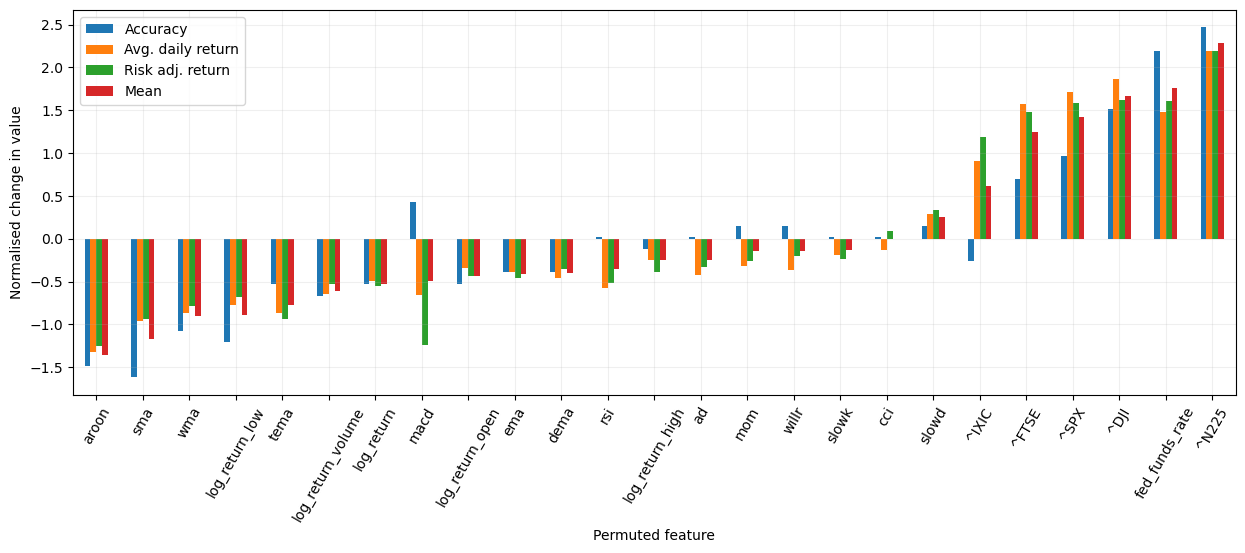

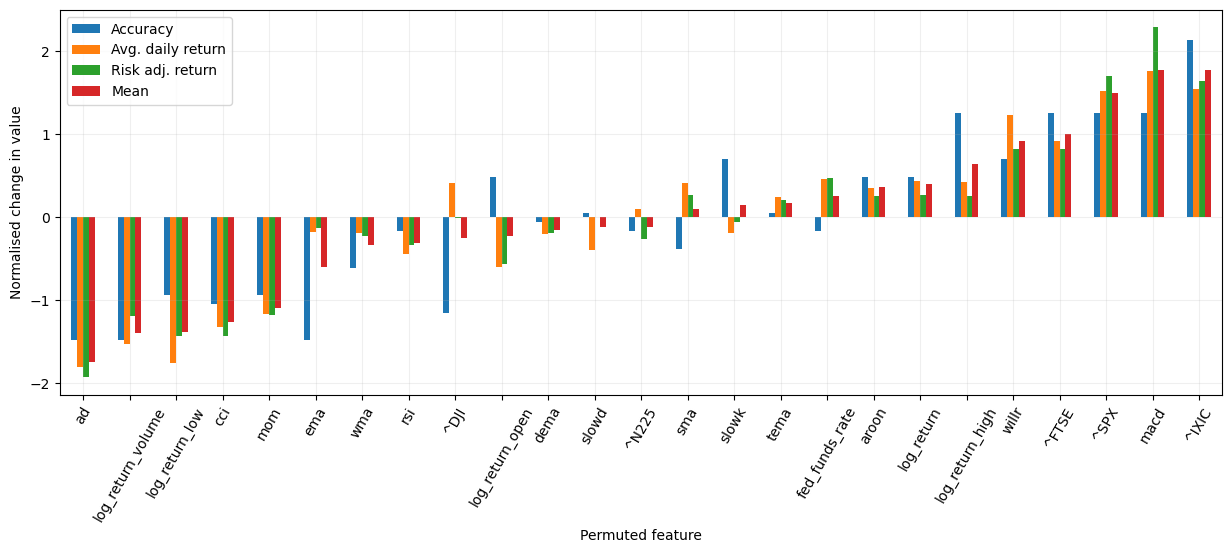

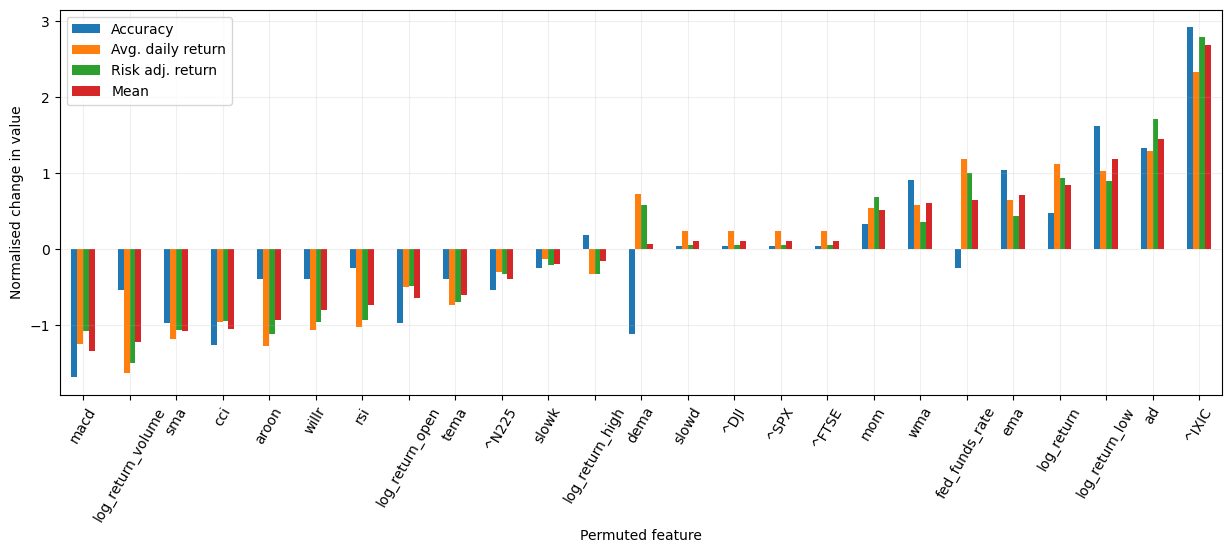

In [301]:
dfs = []
for model in ["LSTM", "CNN", "ConvLSTM"]:
    df = []
    for stock in ["NVDA", "JPM", "UNH", "HD"]:
        df.append(permutation_importance(model, stock))
    df = pd.concat(df).groupby(level=0).mean()[["Accuracy", "Avg. daily return", "Risk adj. return"]]
    df = (df - df.mean()) / df.std()
    df["Mean"] = df.mean(axis=1)
    df = df.sort_values("Mean")
    dfs.append(df)
    fig, ax = plt.subplots(figsize=(15, 5))
    df.plot(kind='bar', ax=ax)
    ax.xaxis.set_tick_params(rotation=60)
    ax.grid(True, alpha=0.2)
    ax.set_ylabel("Normalised change in value")
    ax.set_xlabel("Permuted feature")
dfs = pd.concat(dfs)
dfs = dfs.groupby(level=0).mean()
plt.show()


Averaging across stocks

,Accuracy,Avg. daily return,Risk adj. return,Mean
log_return_volume,-0.89585437,-1.26626483,-1.07317136,-1.07843018
cci,-0.76259351,-0.80684962,-0.76188032,-0.77710782
sma,-0.99231667,-0.58180066,-0.57679983,-0.71697239
aroon,-0.46246681,-0.75119884,-0.70462078,-0.63942881
rsi,-0.13414064,-0.68235326,-0.59439234,-0.47029541
log_return_open,-0.33655843,-0.48358601,-0.49506894,-0.43840446
tema,-0.29072772,-0.45468559,-0.47595069,-0.40712134
log_return_low,-0.17466970,-0.50320276,-0.40901811,-0.36229686
mom,-0.15253991,-0.31574550,-0.25006063,-0.23944868
wma,-0.25963814,-0.15869160,-0.22007282,-0.21280085


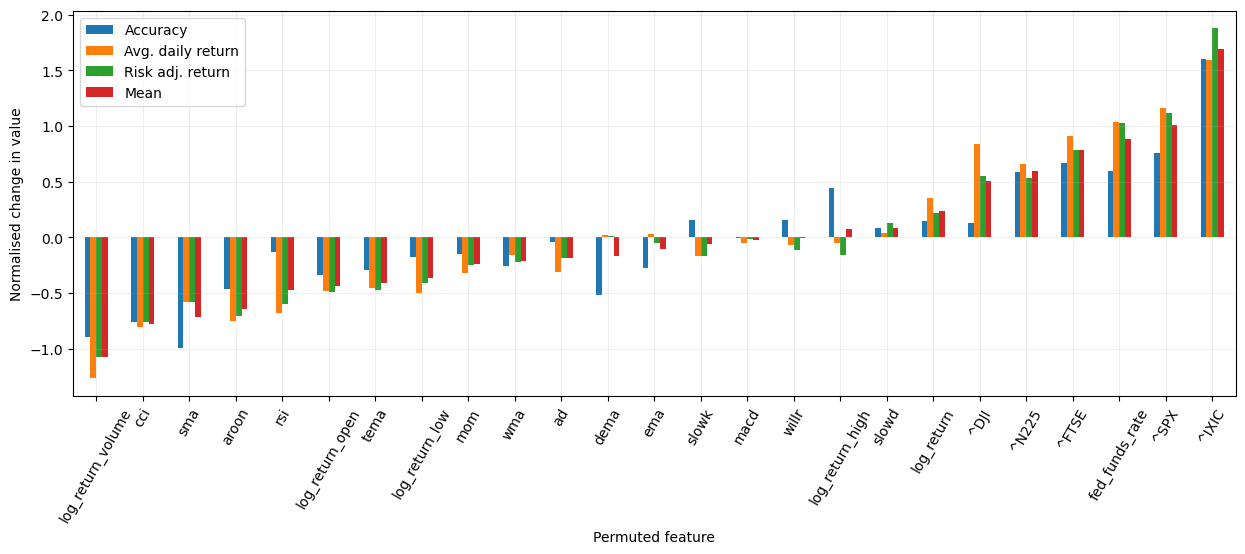

In [307]:
df = dfs.copy()

df = df.sort_values("Mean")
fig, ax = plt.subplots(figsize=(15, 5))
df.plot(kind='bar', ax=ax)
ax.xaxis.set_tick_params(rotation=60)
ax.grid(True, alpha=0.2)
ax.set_ylabel("Normalised change in value")
ax.set_xlabel("Permuted feature")
df

## Linear model

In [6]:
from src.models.statistical.Linear import data
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoLarsIC
from sklearn.pipeline import make_pipeline

In [7]:
coef_series = []

no_reg = []
L1 = []
L2 = []
for s in ["NVDA", "JPM", "HD", "UNH"]:
    X_train, y_train, X_val, y_val, X_test, y_test = data(s, features)

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    series = pd.Series(index=X_train.columns, data=model.coef_).rename("Linear")
    no_reg.append(series)

    model = Lasso(fit_intercept=True, alpha=0.0001)
    # model = LassoLarsIC(fit_intercept=True, criterion="aic")
    model.fit(X_train, y_train)
    series = pd.Series(index=X_train.columns, data=model.coef_).rename("Lasso")
    L1.append(series)

    model = Ridge(fit_intercept=True, alpha=0.01)
    model.fit(X_train, y_train)
    series = pd.Series(index=X_train.columns, data=model.coef_).rename("Ridge")
    L2.append(series)

coef_series.append(pd.concat(no_reg).groupby(level=0).mean())
coef_series.append(pd.concat(L1).groupby(level=0).mean())
coef_series.append(pd.concat(L2).groupby(level=0).mean())

df = pd.concat(coef_series, axis=1)
df = df.sort_values(by="Lasso")
df

,Linear,Lasso,Ridge
rsi,-0.00038000,-0.00034654,-0.00037256
ad,-0.00019192,-0.00033687,-0.00020284
fed_funds_rate,-0.00023750,-0.00018194,-0.00023633
ema,-0.00021096,-0.00014861,-0.00021201
willr,0.00040780,-0.00006327,0.00039673
cci,0.00020521,-0.00002586,0.00020647
mom,-0.00005198,-0.00001379,-0.00004656
tema,0.00023459,-0.00001230,0.00023786
aroon,0.00022882,-0.00001051,0.00022524
macd,-0.00003162,-0.00000514,-0.00002526


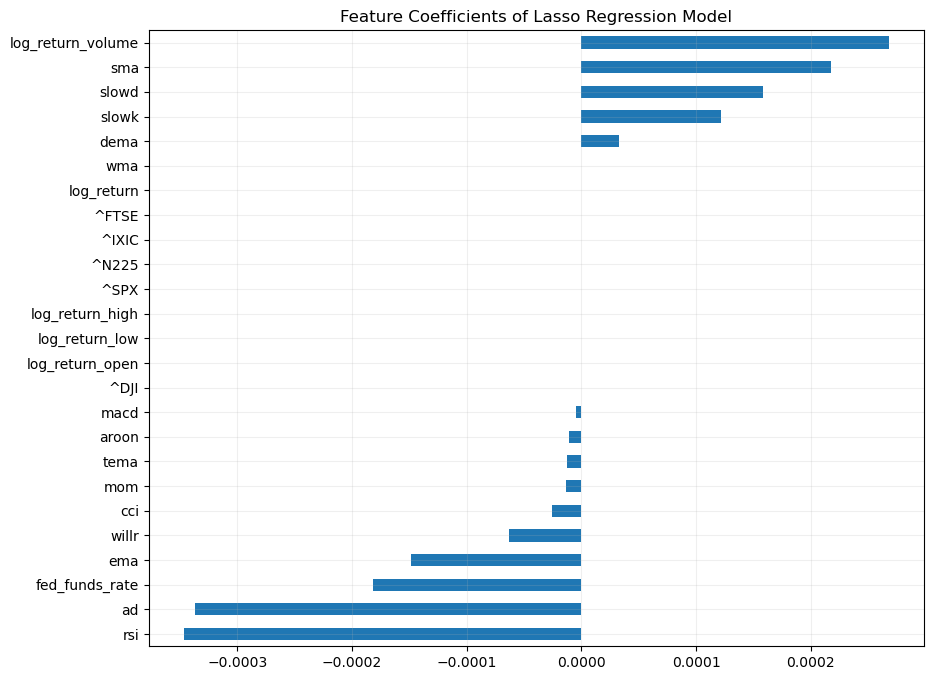

In [8]:
fig, ax = plt.subplots()
df["Lasso"].plot(kind='barh', figsize=(10, 8), title='Feature Coefficients of Lasso Regression Model',ax=ax)
ax.grid(True, alpha=0.2)

## Random forest

In [33]:
from src.models.statistical.RandomForest import data
from sklearn.ensemble import RandomForestRegressor

dfs = []
for s in stocks:
    X_train, y_train, X_val, y_val, X_test, y_test = data(s, features)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    df = pd.DataFrame({
        'Feature Importance': model.feature_importances_,
        'Std': np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    },
    index=X_train.columns)
    dfs.append(df)
dfs = pd.concat(dfs)
dfs = dfs.groupby(level=0).mean().sort_values("Feature Importance", ascending=False)

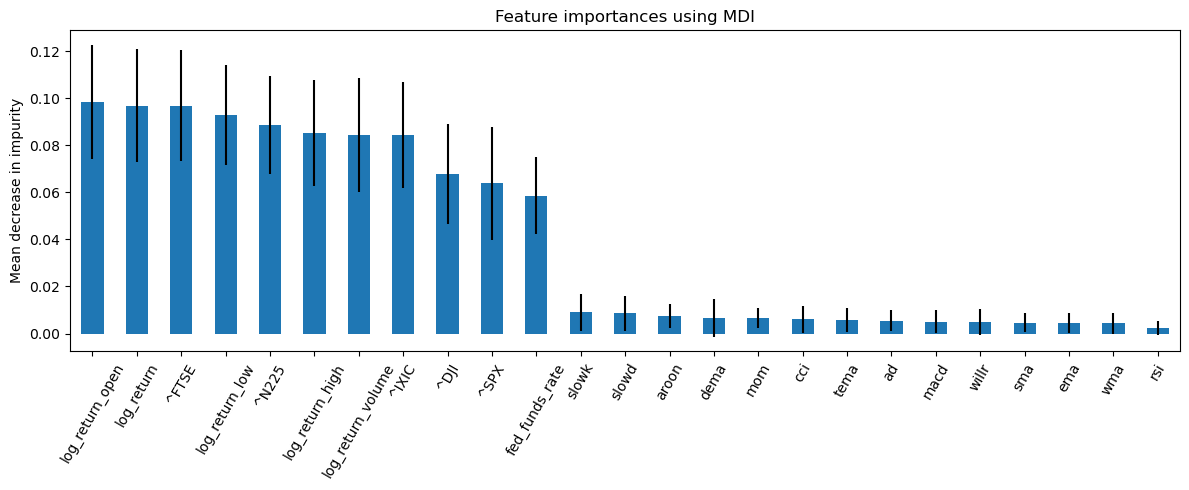

In [36]:
fig, ax = plt.subplots(figsize=(12,5))
dfs["Feature Importance"].plot.bar(yerr=dfs["Std"], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.xaxis.set_tick_params(rotation=60)
fig.tight_layout()

Visualising individual tree

rsi              0.00000000
sma              0.09064458
fed_funds_rate   0.21337907
log_return       0.69597635
dtype: float64
rsi              0.00000000
sma              0.01086256
fed_funds_rate   0.23123626
log_return       0.75790118
dtype: float64
rsi              0.00000000
fed_funds_rate   0.08667353
sma              0.08768303
log_return       0.82564344
dtype: float64
rsi              0.00000000
sma              0.07860289
fed_funds_rate   0.23727181
log_return       0.68412530
dtype: float64


[Text(0.5, 0.8333333333333334, 'x[0] <= 0.044\nsquared_error = 0.0\nsamples = 2914\nvalue = 0.001'),
 Text(0.25, 0.5, 'x[0] <= 0.029\nsquared_error = 0.0\nsamples = 2867\nvalue = 0.001'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2779\nvalue = 0.001'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.001\nsamples = 88\nvalue = 0.01'),
 Text(0.75, 0.5, 'x[1] <= 0.0\nsquared_error = 0.001\nsamples = 47\nvalue = -0.012'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.003\nsamples = 9\nvalue = -0.058'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.001\nsamples = 38\nvalue = -0.003')]

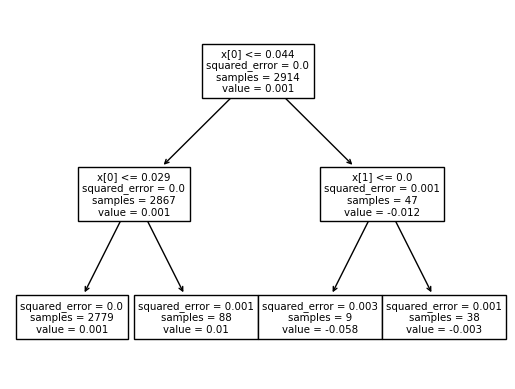

In [10]:
from sklearn import tree

for s in stocks:
    fs = ["log_return", "sma", "rsi", "fed_funds_rate"]
    X_train, y_train, X_val, y_val, X_test, y_test = data(s, fs)
    model = RandomForestRegressor(max_depth=2)
    model.fit(X_train, y_train)
    print(pd.Series(index=X_train.columns, data=model.feature_importances_).sort_values())
tree.plot_tree(model.estimators_[1])